# Using Keras for MNIST

Here is my script for training an ANN to recognize handwritten digits (0-9) on the MNIST data. It runs in about eight minutes on my machine using 59,500 training inputs.

This parameter set gives the highest accuracy I have achieved thus far. 

Time elapsed: 460.393169849
Classification error: Prediction: 9 - True: 0
Classification error: Prediction: 4 - True: 5
Classification error: Prediction: 5 - True: 9
Classification error: Prediction: 0 - True: 2
Classification error: Prediction: 4 - True: 5
Classification error: Prediction: 6 - True: 5
Classification error: Prediction: 4 - True: 5
Classification error: Prediction: 2 - True: 0
Classification error: Prediction: 7 - True: 4
Classification accuracy: 98.20%


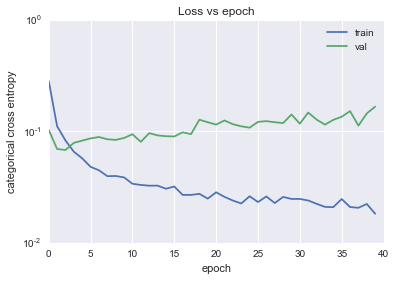

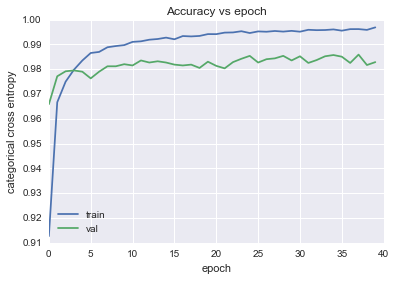

In [2]:
"""
Created on Tue Sep 06 11:40:52 2016

@author: Joseph
This code uses Keras to create and train an ANN to solve the MNIST handwritten
digit recognition problem.

The network has an 784 input nodes (one for each pixel),
794 nodes in 1 hidden layer,
and 10 output nodes (one-hot encoding for result digits 0-9).

A link to the data is included when keras is installed.

The convergence of the loss function and the accuracy are plotted for both 
training and validation data (the validation data is a subset of the training
data set), along with the elapsed time during training (using 8-core i7 laptop 
with GPU enabled).

The model is applied to a subset of the MNIST training data that hasn't been
used in training or validation, and the percentage of accurately classified
digits is reported, along with a list of the misclassified digits and the 
corresponding correct answers.
"""

# import libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer


def data_import(start_row, num_rows):
    '''
    access the dataset and return a portion of it
    '''
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # extract the targets from the records
    target_prep = y_train[start_row:num_rows]

    # extract the input pixels from the records
    X = X_train.reshape(60000, 784).astype('float32')
    inp_prep = X[start_row:num_rows, :]

    # convert targets to one-hot encoding
    target = np_utils.to_categorical(target_prep).astype(int)

    # prescale each input and then Z-scale independently
    inp_prep /= 50
    inp = preprocessing.scale(inp_prep, axis=1)
    return inp, target


# import the data (note: there are 42000 records in train.csv)
ntest = 500                # number of testing data
ntrain = 60000 - ntest     # number of training data
inp, target = data_import(0, ntrain+ntest)

# divide the data into training (including validation) and testing sets
train_in = inp[:ntrain]
train_target = target[:ntrain]
test_in = inp[ntrain:]
test_target = target[ntrain:]

# 1. Define Network
in_cols = train_in.shape[1]
target_cols = train_target.shape[1]
num_hidden_nodes = in_cols + target_cols
# num_hidden_nodes = 500
model = Sequential()
model.add(Dense(num_hidden_nodes,
                input_dim=in_cols,
                activation='relu',
                init='uniform'))
model.add(Dropout(0.2))
model.add(Dense(num_hidden_nodes,
                activation='relu',
                init='uniform'))
model.add(Dropout(0.2))
model.add(Dense(target_cols, activation='softmax', init='uniform'))

# 2. Compile Network
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# start timer
t = timer()

# 3. Fit Network
history = model.fit(train_in,
                    train_target,
                    nb_epoch=40,
                    validation_split=0.1,
                    batch_size=200,
                    verbose=0)

# How long did training take?
print 'Time elapsed:', timer() - t

# Visualize convergence
train_err = history.history['loss']
val_err = history.history['val_loss']
train_acc = history.history['acc']
val_acc = history.history['val_acc']

# 4. Evaluate Network
# generate testing results
predictions = model.predict(test_in)
ct = 0          # error counter

# count the misidentified digits
for index, prediction in enumerate(predictions):
    guess, truth = np.argmax(prediction), np.argmax(test_target[index])
    if guess != truth:
        print "Classification error: Prediction:", guess, "- True:", truth
        ct += 1

# Calculate percentage correctly classified
er_rate = float(ct)/float(len(predictions))
print "Classification accuracy: {0:0.2f}%".format(100*(1 - er_rate))

%matplotlib inline
plt.figure()
plt.semilogy(range(len(train_err)), train_err, label='train')
plt.semilogy(range(len(val_err)), val_err, label='val')
plt.title('Loss vs epoch')
plt.legend(loc=1)
plt.xlabel('epoch')
plt.ylabel('categorical cross entropy')
plt.show()

plt.figure()
plt.plot(range(len(train_acc)), train_acc, label='train')
plt.plot(range(len(val_acc)), val_acc, label='val')
plt.title('Accuracy vs epoch')
plt.legend(loc=3)
plt.xlabel('epoch')
plt.ylabel('categorical cross entropy')
plt.show()